<a href="https://colab.research.google.com/github/Prognosticators/house_price_predictor/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlib
import math

from google.colab import files
uploaded = files.upload()





Saving housing.csv to housing.csv


In [ ]:
df = pd.read_csv('housing.csv')

new_columns = ['longitude','latitude','house_age','rooms','bedrooms','poputation','households','income','price','ocean_proximity']
df.columns = new_columns

column_titles = ['longitude','latitude','house_age','rooms','bedrooms','poputation','households','income','ocean_proximity','price']
df = df.reindex(columns = column_titles)

#some data cleaning and tabulation

In [ ]:
## waste cell
df.head()

,longitude,latitude,house_age,rooms,bedrooms,poputation,households,income,ocean_proximity,price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [ ]:
#df.isnull().sum()

df.dropna(subset= ['bedrooms'],inplace=False)
df['bedrooms'].fillna(value=np.mean(df['bedrooms']),inplace=True)

# conversion to numerical values

df['ocean_proximity'] = df.ocean_proximity.str.replace('NEAR BAY','0')
df['ocean_proximity'] = df.ocean_proximity.str.replace('<1H OCEAN','1')
df['ocean_proximity'] = df.ocean_proximity.str.replace('INLAND','2')
df['ocean_proximity'] = df.ocean_proximity.str.replace('NEAR OCEAN','3')
df['ocean_proximity'] = df.ocean_proximity.str.replace('ISLAND','4')



In [ ]:
df['ocean_proximity'] = df.ocean_proximity.astype('float64')

In [ ]:
#df.drop(df.iloc[:, 1:3], inplace = True, axis = 1) # to drop columns 

In [ ]:
train_df, test_df, validate_df = np.split(df, [int(.8 * len(df)), int(.9 * len(df))])
#splitting the data into train test and validate

In [ ]:
train_df

,longitude,latitude,house_age,rooms,bedrooms,poputation,households,income,ocean_proximity,price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...
16507,-121.11,37.74,11.0,3886.0,599.0,1605.0,529.0,4.4213,2.0,182700.0
16508,-121.10,37.80,35.0,1853.0,331.0,958.0,340.0,3.3578,2.0,149000.0
16509,-121.11,37.76,22.0,2606.0,411.0,1252.0,397.0,4.1833,2.0,192100.0
16510,-121.16,37.73,7.0,4956.0,941.0,3006.0,915.0,3.4426,2.0,139000.0


In [ ]:
for col in (train_df.columns):
  print(col) 

longitude
latitude
house_age
rooms
bedrooms
poputation
households
income
ocean_proximity
price


In [ ]:
#         mean part 1
def mean_from_sctrach(d1_col):
  total = 0
  for i in range(len(d1_col)):
    total+=d1_col[i]
  return(total/(i+1))


In [ ]:
#                                         mean  2
def mean_from_sctrach(d1_col):
  mean = (sum(d1_col))/len(d1_col)
  return mean

In [ ]:
#  Standard deviation
def std_from_sctrach(d1_col):
  N = len(d1_col)
  mean = mean_from_sctrach(d1_col)   # reuseblity of code -->
  var  = sum(pow(x-mean,2) for x in d1_col) / N  # variance
  std  = math.sqrt(var) 
  return std

In [ ]:
total = 0
for i in range(len(train_df['longitude'])):
  total+=train_df['longitude'][i]
print(total/(i+1))


-119.1311476501919


In [ ]:
train_df['longitude'][0]

-122.23

In [ ]:
mean_from_sctrach(train_df['longitude'])

-119.1311476501919

In [ ]:
print(np.mean(train_df['longitude']))

-119.1311476501919


In [ ]:
std_from_sctrach(train_df['longitude'])

1.9227285840311916

In [ ]:
print(np.std(train_df['longitude']))

1.9227285840311916


In [ ]:
train_df.dtypes

longitude          float64
latitude           float64
house_age          float64
rooms              float64
bedrooms           float64
poputation         float64
households         float64
income             float64
ocean_proximity    float64
price              float64
dtype: object

In [ ]:
Old_train_df = train_df.copy()

In [ ]:
for col in (train_df.columns):
  std = np.std(train_df[col])
  Mean = np.mean(train_df[col])
  train_df[col] = (train_df[col] - Mean)/ std

In [ ]:
train_df

,longitude,latitude,house_age,rooms,bedrooms,poputation,households,income,ocean_proximity,price
0,-1.611695,1.258392,0.916627,-0.780765,-0.957118,-0.961217,-0.960953,2.417615,-1.695174,2.206947
1,-1.606494,1.248807,-0.647225,1.983551,1.295156,0.830056,1.614396,2.404898,-1.695174,1.378020
2,-1.616896,1.244014,1.776746,-0.519846,-0.816495,-0.811298,-0.831168,1.847079,-1.695174,1.321642
3,-1.622097,1.244014,1.776746,-0.605634,-0.712756,-0.757879,-0.724286,0.984544,-1.695174,1.226505
4,-1.622097,1.244014,1.776746,-0.448727,-0.609018,-0.751848,-0.622493,0.024444,-1.695174,1.234433
...,...,...,...,...,...,...,...,...,...,...
16507,-1.029190,1.191297,-1.429150,0.555388,0.126371,0.144220,0.064606,0.331725,0.708494,-0.170604
16508,-1.023989,1.220052,0.447472,-0.348271,-0.491448,-0.413238,-0.416363,-0.236513,0.708494,-0.467468
16509,-1.029190,1.200882,-0.569032,-0.013566,-0.307024,-0.159926,-0.271309,0.204560,0.708494,-0.087800
16510,-1.055194,1.186504,-1.741921,1.030997,0.914782,1.351326,1.046903,-0.191203,0.708494,-0.555558


In [ ]:
train_data = train_df.values


X = train_data[:, :-1]
Y = train_data[:,-1].reshape(train_data.shape[0],1)



In [ ]:
#waste cell
Y = Y.astype('float64')
Y

array([[ 2.2069475 ],
       [ 1.37801963],
       [ 1.32164197],
       ...,
       [-0.08779968],
       [-0.55555813],
       [-0.17324708]])

In [ ]:
def transpose_from_sctrach(d1_cols):
  rows = d1_cols.shape[0]
  cols = d1_cols.shape[1]
  #res = [0]*rows # give memory to save result by initalizing by zero
  new_d1 = np.zeros((cols,rows))


  for i in range(rows):
    for j in range(cols):
      new_d1[j][i] = d1_cols[i][j]

  return new_d1

In [ ]:
Q = np.vstack((np.ones((X.shape[0], )), X.T))
X = Q.T

#stacking ones and transposing

In [ ]:
print(X.dtype)
print(Y.dtype)
print(X)
print(Y)

float64
float64
[[ 1.         -1.61169516  1.25839198 ... -0.96095304  2.41761472
  -1.69517359]
 [ 1.         -1.60649422  1.24880693 ...  1.61439588  2.40489816
  -1.69517359]
 [ 1.         -1.6168961   1.2440144  ... -0.83116767  1.84707938
  -1.69517359]
 ...
 [ 1.         -1.02918965  1.20088167 ... -0.27130921  0.20455956
   0.70849376]
 [ 1.         -1.05519436  1.1865041  ...  1.04690299 -0.19120325
   0.70849376]
 [ 1.         -1.10200283  1.20088167 ... -0.28657807 -0.21348394
   0.70849376]]
[[ 2.2069475 ]
 [ 1.37801963]
 [ 1.32164197]
 ...
 [-0.08779968]
 [-0.55555813]
 [-0.17324708]]


In [ ]:
## waste cell
X = X.astype('float64')
X.dtype
print(X.shape)

(16512, 10)


In [ ]:
# Waste Cell
# theta = np.zeros((X.shape[1], 1))
# theta = theta.astype(object)
# theta.dtype
def custommultiply(df1,df2):
  result = np.zeros((df1.shape[0],df2.shape[1]))

  for i in range(df1.shape[0]):
    for j in range(df2.shape[1]):
        for k in range(df1.shape[1]):
            result[i][j] += df1[i][k] * df2[k][j]
  return result


In [ ]:
a = np.array([[1,1,1],[2,3,2]])
b = np.array([[1,2],[2,3],[3,4]])
c = custommultiply(a,b)
print(c)


[[ 6.  9.]
 [14. 21.]]


In [ ]:

#our model for multiple regression
def model(X, Y, learning_rate, iteration):
  #learning_rate -> alpha
  #iteration -> basically how many times we want to run the loop

  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  cost_list = []


  for i in range(iteration):

    #y_pred = np.dot(X, theta)
    y_pred = custommultiply(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))

    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta

    cost_list.append(cost)

    if(i%(iteration/100) == 0):
      print("Cost is :", cost)

  return theta, cost_list

In [ ]:
iteration = 200 #trying with higher iteration setting to get better result
learning_rate = 0.01
theta, cost_list = model (X, Y, learning_rate = learning_rate, iteration = iteration)
#Iteration - 200 || Learning rate - 0.01 || Time - 1 min 2 sec ||  error - 0.35 || 1st time
#Iteration - 200 || Learning rate - 0.01 || Time - 1 min 2 sec ||  error - 0.62 || 2nd time
#Iteration - 100 || Learning rate - 0.01 || Time - 31 sec ||  error - 1.79
#Iteration - 100 || Learning rate - 0.005 || Time - 30 sec ||  error - 2.71
#Iteration - 200 || Learning rate - 0.005 || Time - 1 min 1 sec ||  error - 2.285
#Iteration - 200 || Learning rate - 0.02 || Time - 1 min 2 sec ||  error - 6.46
#Iteration - 300 || Learning rate - 0.01 || Time - 1 min 33 sec ||  error - 1.5

In [ ]:

iteration = 200 #trying with higher iteration setting to get better result
learning_rate = 0.01
theta, cost_list = model (X, Y, learning_rate = learning_rate, iteration = iteration)
#Iteration - 200 || Learning rate - 0.01 || Time - 1 min 2 sec ||  error - 0.35 || 1st time
#Iteration - 200 || Learning rate - 0.01 || Time - 1 min 2 sec ||  error - 0.62 || 2nd time
#Iteration - 100 || Learning rate - 0.01 || Time - 31 sec ||  error - 1.79
#Iteration - 100 || Learning rate - 0.005 || Time - 30 sec ||  error - 2.71
#Iteration - 200 || Learning rate - 0.005 || Time - 1 min 1 sec ||  error - 2.285
#Iteration - 200 || Learning rate - 0.02 || Time - 1 min 2 sec ||  error - 6.46
#Iteration - 300 || Learning rate - 0.01 || Time - 1 min 33 sec ||  error - 1.53

Cost is : 0.5000000000000089
Cost is : 0.4828026821186889
Cost is : 0.4667736788925683
Cost is : 0.451821967514429
Cost is : 0.4378655935788165
Cost is : 0.4248304225419901
Cost is : 0.4126491116015451
Cost is : 0.40126025808349436
Cost is : 0.3906076895783333
Cost is : 0.3806398682837367
Cost is : 0.3713093877022688
Cost is : 0.3625725443322037
Cost is : 0.35438897053351137
Cost is : 0.34672131755014457
Cost is : 0.3395349798820642
Cost is : 0.33279785395038985
Cost is : 0.32648012538461185
Cost is : 0.32055408035904703
Cost is : 0.3149939372773655
Cost is : 0.30977569579685943
Cost is : 0.30487700073580226
Cost is : 0.3002770188474143
Cost is : 0.2959563267959513
Cost is : 0.2918968089526884
Cost is : 0.28808156385657885
Cost is : 0.28449481836757123
Cost is : 0.28112184868898904
Cost is : 0.27794890755614743
Cost is : 0.27496315698710705
Cost is : 0.27215260607260827
Cost is : 0.26950605334929234
Cost is : 0.26701303335608106
Cost is : 0.26466376702026534
Cost is : 0.262449115559180

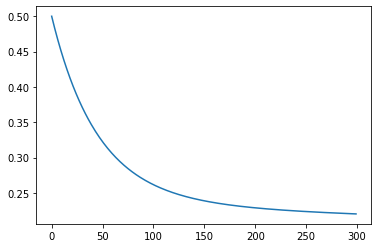

In [ ]:

rng = np.arange(0, iteration)
mlib.pyplot.plot(rng, cost_list)
mlib.pyplot.show()

In [ ]:
test_df

,longitude,latitude,house_age,rooms,bedrooms,poputation,households,income,ocean_proximity,price
16512,127.767280,-32.249810,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.313958,-19.453229,-1.780026
16513,127.767280,-32.249559,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.307309,-19.453229,-1.780026
16514,127.767280,-32.249587,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.317400,-19.453229,-1.780026
16515,127.767280,-32.249587,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.317358,-19.453229,-1.780026
16516,127.767333,-32.249559,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.311578,-19.453229,-1.780026
...,...,...,...,...,...,...,...,...,...,...
18571,127.764389,-32.252036,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.308805,-23.805891,-1.780026
18572,127.764442,-32.252064,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.320264,-23.805891,-1.780026
18573,127.764389,-32.252064,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.318448,-23.805891,-1.780026
18574,127.764442,-32.252064,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.314469,-23.805891,-1.780026


In [ ]:
for col in (test_df.columns):
  std = np.std(Old_train_df[col])
  Mean = np.mean(Old_train_df[col])
  test_df[col] = (test_df[col] - Mean)/ std

In [ ]:
test_df

,longitude,latitude,house_age,rooms,bedrooms,poputation,households,income,ocean_proximity,price
16512,128.410442,-32.351496,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.335603,-25.074719,-1.780026
16513,128.410442,-32.351376,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.332050,-25.074719,-1.780026
16514,128.410442,-32.351390,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.337442,-25.074719,-1.780026
16515,128.410442,-32.351390,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.337420,-25.074719,-1.780026
16516,128.410470,-32.351376,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.334332,-25.074719,-1.780026
...,...,...,...,...,...,...,...,...,...,...
18571,128.408938,-32.352564,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.332850,-30.305895,-1.780026
18572,128.408966,-32.352577,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.338973,-30.305895,-1.780026
18573,128.408938,-32.352577,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.338002,-30.305895,-1.780026
18574,128.408966,-32.352577,-2.483457,-1.172442,-1.257399,-1.239722,-1.284869,-4.335876,-30.305895,-1.780026


In [ ]:
test_data = test_df.values

Y_test = test_data[:, -1].reshape(test_data.shape[0],1)
X_test = test_data[:, :-1]

X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T


In [ ]:
X_test = X_test.astype('float64')
theta = theta.astype('float64')

In [ ]:
#Waste Cell

In [ ]:

y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

error

1.5389715473057919